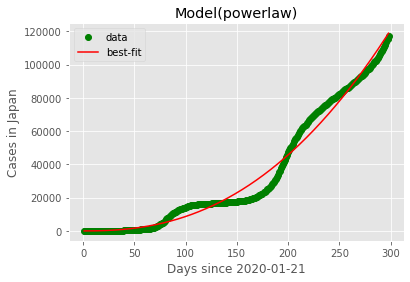

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from lmfit import models
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
import c19all

df = pickle.load(open( '../../output/pickles/df_all.p', 'rb'))

''' Define the analytic dataset
    count_of:   required, `cases` or `deaths`
    start_date: required, >= 2020-01-02
    country:    optional, comment out the declaration for global data
'''
count_of = 'cases'
start_date = pd.to_datetime('2020-01-21')
country = 'Japan'

# See https://lmfit.github.io/lmfit-py/builtin_models.html for model options
df = df[count_of]
if 'country' in locals():
    df = c19all.for_country(df, country)
    ylabel = f'{count_of.capitalize()} in {country}' if country else f'Global {count_of}'
else:
    ylabel = f'Global {count_of}'
df = df[df.date >= start_date]
df.day = df.day.apply(lambda day: (day - (c19all.date_to_day(start_date ) - 1)))
df = df.groupby('day').sum().reset_index()
model = models.PowerLawModel()
params = model.make_params()
result = model.fit(df[count_of], params, x=df.day.to_list())
plt.style.use('ggplot')
xlabel = f'Days since {start_date.strftime("%Y-%m-%d")}'
result.plot_fit(xlabel=xlabel, ylabel=ylabel, datafmt='og', fitfmt='r')